In [1]:
# Import the jimmy_slots submodule
import matplotlib.pyplot as plt
from learntools.python import jimmy_slots

In [16]:
from learntools.core import binder; binder.bind(globals())
from learntools.python.ex7 import *
print('Setup complete.')

Setup complete.


In [2]:
plt.clf() 

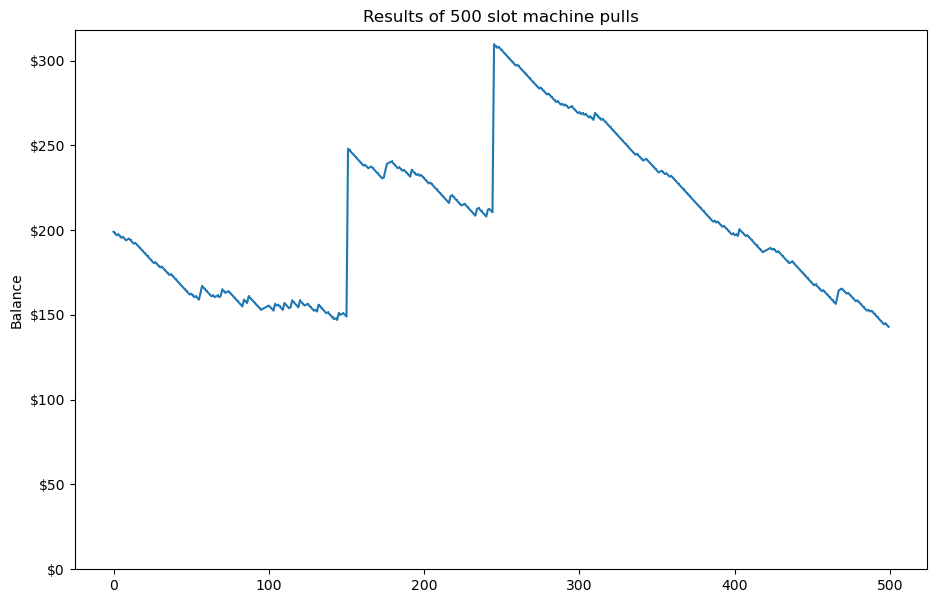

In [20]:
def prettify_graph(graph):
    """Modify the given graph according to Jimmy's requests: add a title, make the y-axis
    start at 0, label the y-axis. (And, if you're feeling ambitious, format the tick marks
    as dollar amounts using the "$" symbol.)
    """
    max_y_value = graph.get_ylim()[1]
    graph.set_ylim(0, max_y_value)

    graph.yaxis.set_major_formatter('${x:1.0f}')
    
    graph.set(title= 'Results of 500 slot machine pulls', ylabel= 'Balance')
    plt.show()


q1 = jimmy_slots.get_graph()
prettify_graph(q1)
plt.show()

In [18]:
q1.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
def prettify_graph(graph):
    graph.set_title("Results of 500 slot machine pulls")
    # Make the y-axis begin at 0
    graph.set_ylim(bottom=0)
    # Label the y-axis
    graph.set_ylabel("Balance")
    # Bonus: format the numbers on the y-axis as dollar amounts
    # An array of the values displayed on the y-axis (150, 175, 200, etc.)
    ticks = graph.get_yticks()
    # Format those values into strings beginning with dollar sign
    new_labels = ['${}'.format(int(amt)) for amt in ticks]
    # Set the new labels
    graph.set_yticklabels(new_labels)
```

In [5]:
def best_items(racers):
    """Given a list of racer dictionaries, return a dictionary mapping items to the number
    of times those items were picked up by racers who finished in first place.
    """
    winner_item_counts = {}
    for i in range(len(racers)):
        # The i'th racer dictionary
        racer = racers[i]
        # We're only interested in racers who finished in first
        if racer['finish'] == 1:
            for i in racer['items']:
                # Add one to the count for this item (adding it to the dict if necessary)
                if i not in winner_item_counts:
                    winner_item_counts[i] = 0
                winner_item_counts[i] += 1

        # Data quality issues :/ Print a warning about racers with no name set. We'll take care of it later.
        if racer['name'] is None:
            print("WARNING: Encountered racer with unknown name on iteration {}/{} (racer = {})".format(
                i+1, len(racers), racer['name'])
                 )
    return winner_item_counts

In [6]:
sample = [
    {'name': 'Peach', 'items': ['green shell', 'banana', 'green shell',], 'finish': 3},
    {'name': 'Bowser', 'items': ['green shell',], 'finish': 1},
    {'name': None, 'items': ['mushroom',], 'finish': 2},
    {'name': 'Toad', 'items': ['green shell', 'mushroom'], 'finish': 1},
]
best_items(sample)

{'green shell': 2, 'mushroom': 1}

In [7]:
for i in range(len(sample)):
        # The i'th racer dictionary
        racer = sample[i]
        print(racer)

{'name': 'Peach', 'items': ['green shell', 'banana', 'green shell'], 'finish': 3}
{'name': 'Bowser', 'items': ['green shell'], 'finish': 1}
{'name': None, 'items': ['mushroom'], 'finish': 2}
{'name': 'Toad', 'items': ['green shell', 'mushroom'], 'finish': 1}


In [41]:
# Import luigi's full dataset of race data
from learntools.python.luigi_analysis import full_dataset

# Fix me!
def best_items(racers):
    winner_item_counts = {}
    for i in range(len(racers)):
        # The i'th racer dictionary
        racer = racers[i]
        # We're only interested in racers who finished in first
        if racer['finish'] == 1:
            for item in racer['items']:
                # Add one to the count for this item (adding it to the dict if necessary)
                if item not in winner_item_counts:
                    winner_item_counts[item] = 0
                winner_item_counts[item] += 1

        # Data quality issues :/ Print a warning about racers with no name set. We'll take care of it later.
        if racer['name'] is None:
            #current_index = full_dataset.index(racer)
            print(f"WARNING: Encountered racer with unknown name on iteration {i+1}/{len(racers)} (racer = {racer['name']})")
    
    return winner_item_counts

# Try analyzing the imported full dataset
best_items(full_dataset)

{'green shell': 4, 'banana': 1, 'red shell': 1, 'blue shell': 1, 'star': 1}

In [21]:
q2.hint()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> A couple things to consider:

- What is the type of variable `i`?
- What happens if you inspect the `full_dataset` list you imported? (Don't worry, it's not actually that big.) Can you find the racer that's causing the error?

In [39]:
q2.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> Luigi used the variable name `i` to represent each item in racer['items'].
However, he also used `i` as the loop variable for the outer loop (`for i in range(len(racers))`).
These i's are clobbering each other. This becomes a problem only if we encounter a racer
with a finish of 1 and a name of `None`. If that happens, when we try to print the "WARNING" message,
`i` refers to a string like "green shell", which python can't add to an integer, hence a `TypeError`.

This is similar to the issue we saw when we imported * from `math` and `numpy`. They both contained variables called `log`, and the one we got when we tried to call it was the wrong one.

We can fix this by using different loop variables for the inner and outer loops. `i` wasn't a very
good variable name for the inner loop anyways. `for item in racer['items']` fixes the bug and is 
easier to read.

Variable shadowing bugs like this don't come up super often, but when they do they can take an infuriating amount of time to diagnose!


In [71]:
def adding_As(total, Anum):
    
    if total + 11 * Anum > 21:
        if total + 11 + Anum - 1 > 21:
            total += Anum
        else:
            total += 11 + Anum - 1
    else:
        total += 11 * Anum
    
    return total
        

def handtotal(hand):
    
    hand_total = 0
    hand_A_count = 0
    for i in range(len(hand)):
        if isinstance(hand[i], str):
            if hand[i] == 'J' or hand[i] == 'Q' or hand[i] == 'K' or hand[i] == 'A':
                pass
            else:
                raise ValueError("Card str value must be J, K, Q or A")
                
        if isinstance(hand[i], int):
            if hand[i] > 10 or hand[i] < 1:
                raise ValueError("Card int value must be between 1 and 10")
            hand_total += hand[i]
        else:
            if hand[i] == 'J' or hand[i] == 'Q' or hand[i] == 'K':
                hand_total += 10
            if hand[i] == 'A':
                hand_A_count += 1
            
    
    hand_total = adding_As(hand_total, hand_A_count)
    
    return hand_total
    

def blackjack_hand_greater_than(hand_1, hand_2):
    
    """
    Return True if hand_1 beats hand_2, and False otherwise.
    
    """
    print(handtotal(hand_1))
    print(handtotal(hand_2))
    
    if handtotal(hand_1) > 21:
        return False
    
    if handtotal(hand_2) > 21:
        return True
    
    if handtotal(hand_1) > handtotal(hand_2):
        return True
    
    return False


'''
    
In order for hand_1 to beat hand_2 the following must be true:
    - The total of hand_1 must not exceed 21
    - The total of hand_1 must exceed the total of hand_2 OR hand_2's total must exceed 21
    
    Examples:
    >>> blackjack_hand_greater_than(['K'], ['3', '4'])
    True
    >>> blackjack_hand_greater_than(['K'], ['10'])
    False
    >>> blackjack_hand_greater_than(['K', 'K', '2'], ['3'])
    False
    
'''    
   
hand1 = ['A', 'A', 4, 5]
hand2 = ['J', 'A', 1, 1]
blackjack_hand_greater_than(hand1, hand2)


# Check your answer
#q3.check()

21
13


True